In [18]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# preprocessing

In [86]:
df1 = pd.read_excel("without.xlsx")
df2 = pd.read_excel("with.xlsx")
questions = list(df1.columns[2:-2])
revsered_questions = ["While I was reading the narrative, activity going on in the room around me was on my mind.",
                     "I found my mind wandering while reading the narrative."]
words_questions = ['Which plot of this story prompted you to reflect on the handling of events in your past experience, and how did it promote it? What exactly happened?',
                     'What plot of this story prompted you to think about how you can deal with people in the future? Which plots and how were they promoted?']

In [87]:
df2[revsered_questions[0]] = df2[revsered_questions[0]].apply(lambda x:8-x)
df2[revsered_questions[1]] = df2[revsered_questions[1]].apply(lambda x:8-x)
df1.dropna(inplace=True)
df2.dropna(inplace=True)

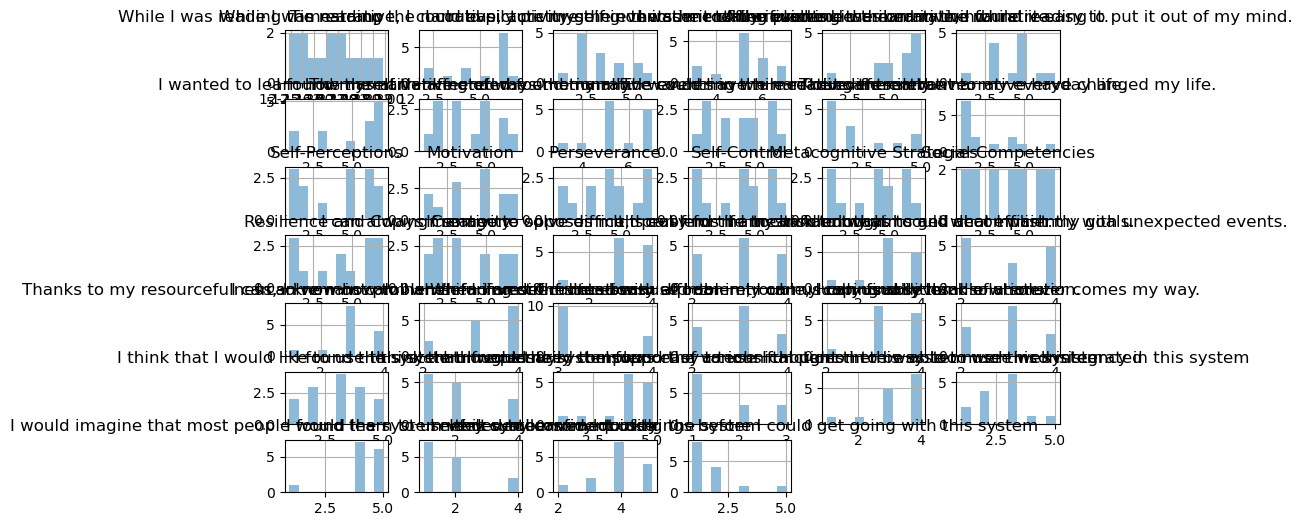

In [19]:
df2.hist(alpha=0.5, figsize=(10, 6))
plt.show()

# tests

对于比较对照组和实验组在量表数据（程度从1到7）上的差异，可以使用以下几种统计检验方法：

(1)独立样本t检验（Independent Samples t-Test）：如果你的数据满足正态分布，并且两组的方差相等（可以用Levene's Test检验方差齐性），那么可以使用独立样本t检验。这种检验适用于比较两组独立样本的平均值。

(2)Mann-Whitney U检验：如果你的数据不满足正态分布，可以使用Mann-Whitney U检验，这是一种非参数检验，用于比较两个独立样本的中位数。

(3)Wilcoxon秩和检验：这也是一种非参数检验，适用于当数据不满足正态分布时，比较两个相关或配对样本的差异。

(4)方差分析（ANOVA）：如果你的实验设计包括多于两个组，可以考虑使用单因素或多因素方差分析。如果数据不满足正态分布，可以考虑使用Kruskal-Wallis H检验（多个独立样本的非参数检验方法）。

在选择检验方法时，需要考虑数据的分布特性（是否正态分布）、样本的独立性、以及样本大小。如果不确定哪种检验最合适，可以先进行数据的描述性统计和正态性检验。同时，也可以考虑咨询统计专家。

In [88]:
test_methods = {"t-test":stats.ttest_ind, "Mann-Whitney":stats.mannwhitneyu, "wilcoxon":stats.wilcoxon}

In [92]:
def test_p(column_name, test_method):
    control_group, experimental_group = df1[column_name], df2[column_name]
    t_statistic, p_value = test_method(control_group, experimental_group)
    return t_statistic, p_value 

In [99]:
# t_test
def stats_df(test_method):
    statistics = []
    p_values = []
    for i in range(len(questions)):
        statistic, p_value = test_p(questions[i], test_method)
        statistics.append(statistic)
        p_values.append(p_value)
        # print(questions[i])
        # print("   statistic:", t_statistic, "   p_value:", p_value)
        # print()
    df_test = pd.DataFrame({"question":questions,"statistics":statistics, "p_values":p_values})
    return df_test

In [100]:
df_t_test = stats_df(stats.ttest_ind)
df_t_test

,question,statistics,p_values
0,"While I was reading the narrative, I could eas...",0.695700,0.495039
1,"While I was reading the narrative, activity go...",1.862082,0.078132
2,I could picture myself in the scene of the eve...,-1.410842,0.174455
3,I was mentally involved in the narrative while...,-1.338585,0.196504
4,"After finishing the narrative, I found it easy...",0.185840,0.854540
5,I wanted to learn how the narrative ended.,-0.234693,0.816957
6,The narrative affected me emotionally.,-1.602396,0.125563
7,I found myself thinking of ways the narrative ...,-2.343282,0.030147
8,I found my mind wandering while reading the na...,1.277337,0.216872
9,The events in the narrative are relevant to my...,-0.361158,0.721966


In [101]:
df_u_test = stats_df(stats.mannwhitneyu)
df_u_test

,question,statistics,p_values
0,"While I was reading the narrative, I could eas...",65.0,0.484316
1,"While I was reading the narrative, activity go...",78.0,0.106287
2,I could picture myself in the scene of the eve...,37.0,0.209506
3,I was mentally involved in the narrative while...,36.0,0.184629
4,"After finishing the narrative, I found it easy...",60.0,0.746926
5,I wanted to learn how the narrative ended.,52.0,0.857958
6,The narrative affected me emotionally.,34.0,0.141547
7,I found myself thinking of ways the narrative ...,28.5,0.062786
8,I found my mind wandering while reading the na...,69.5,0.310136
9,The events in the narrative are relevant to my...,56.0,0.970135


In [103]:
df_wilcoxon = stats_df(stats.wilcoxon)
df_wilcoxon

ValueError: The samples x and y must have the same length.